In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st



(1) The number of busy lines in a trunk group (Erlang system) is given by a truncated Poisson distribution $$P(i) = c*\frac{A^i}{i!},\quad i=0,... m$$

Generate values from this distribution by applying the Metropolis-Hastings algorithm, verify with a χ2-test. You can use the parameter values from exercise 4.

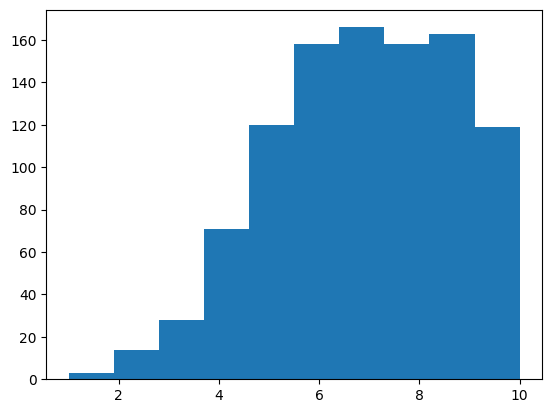

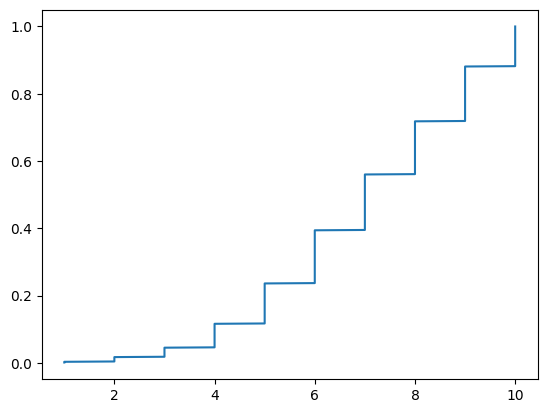

In [173]:
def gen_erlang_system(m,mat,mst,size):
    A = mat*mst
    g = lambda i: (A**i / np.math.factorial(i))
    x = np.random.randint(0,m)
    holder = []
    while(len(holder)<size):
        xc = np.random.uniform() #generate a candidate - no need to work with conditional
        #alpha = f(xc+x)/f(x)
        if(xc>=0.5):
            dx = 1
        else:
            dx = -1
        x_tmp = x + dx
        if(x_tmp>10):
            x_tmp = 0
        elif(x_tmp<0):
            x_tmp = 10

        alpha_c = g(x_tmp)
        alpha = g(x)

        if(alpha_c>=alpha):#accept
            x = x_tmp
        else:#lottery 
            U = np.random.uniform() #lottery draw 
            tmp_alpha = alpha_c/alpha
            if(U<=tmp_alpha):#accept
                x = x_tmp
        holder.append(x)
    return holder

m = 10
lamb = 1 
s = 8
SIM_ERLANG = gen_erlang_system(m,lamb,s,1000)

plt.figure()
plt.hist(SIM_ERLANG)

def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

plt.figure()
xcdf,ycdf = ecdf(SIM_ERLANG)
plt.plot(xcdf,ycdf)


plt.figure()
plt.plot(np.cumsum(SIM_ERLANG))

#theoretical 
def erlang_system_chisq(data,mat,mst,m,significance):
    A = mat*mst
    P = [(A**i)/np.math.factorial(i) for i in range(m+1)]
    print("SUM P ",sum(P))
    c = 1/sum(P)
    P = [i*c*len(data) for i in P]
    print("EXPECTED: ",P)
    counts, P_measured = np.unique(data,return_counts=True)
    counts = counts.tolist()
    #P_measured = [i for i in P_measured] #convert to frequency
    num_vals = m+1
    all_counts = [x for x in range(num_vals)]
    if(len(counts)<num_vals):
        P_measured_tmp = []
        for i, entry in enumerate(all_counts):
            idx = counts.index(entry) if entry in counts else -1
            if(idx==-1):
                P_measured_tmp.append(0)
            else:
                P_measured_tmp.append(P_measured[idx])
        P_measured = P_measured_tmp
    print("MEASURED: ",P_measured)
    X2,p = st.chisquare(P_measured,P,ddof=m-1) #df = k-1 (m-1), is default value
    if(p>significance):
        print("H0: accepted")
    else:
        print("H0: rejected")
    return p   



Test with chi-square-distribution using expected frequencies

In [174]:
p = erlang_system_chisq(SIM_ERLANG,lamb,s,m,0.05) #NEED FIX; NEED USE NUMBER OF EXPECTED AND NOT FREQUENCY AND DOF = GROUPS - 1 
print(p)
#P-value should be bad because not independent. Decrease dependancy by only sampling each n'th as they are less dependent



SUM P  2432.12126984127
EXPECTED:  [0.41116370815887154, 3.2893096652709723, 13.15723866108389, 35.08596976289037, 70.17193952578074, 112.27510324124918, 149.70013765499894, 171.08587160571304, 171.08587160571304, 152.0763303161894, 121.66106425295149]
MEASURED:  [0, 3, 14, 28, 71, 120, 158, 166, 158, 163, 119]
H0: rejected
0.026577357642253906


In [142]:
counts, values = np.unique(SIM_ERLANG,return_counts=True)
print(counts,values)


[ 2  3  4  5  6  7  8  9 10] [ 13  32  92 147 161 171 164 125  95]


<h>(2)</h> For two different call types the joint number of occupied lines is given by $$P(i,j)=c*\frac{A_{1}^{i}}{i!}\frac{A_{2}^{i}}{j!}, \quad 0\leq i+j\leq m$$

Use A1=A2=4, m= 10

(a) Use mtropolis-hastings directly to generate variates from this distribution

In [145]:
def gen_joint_erlang_system(A,m,size):
    g = lambda i: (A**i / np.math.factorial(i))
    #init start-values
    x = np.random.randint(0,m)
    my = m-x
    y = np.random.randint(0,my)
    holderX = []
    holderY = []
    while(len(holderY)<size):
        xc = np.random.uniform() #generate a candidate - no need to work with conditional
        #alpha = f(xc+x)/f(x)
        if(xc>=0.5):
            dx = 1
        else:
            dx = -1
        x_tmp = x + dx
        if(x_tmp>m):
            x_tmp = 0
        elif(x_tmp<0):
            x_tmp = m

        alpha_c = g(x_tmp)
        alpha = g(x)

        if(alpha_c>=alpha):#accept
            x = x_tmp
        else:#lottery 
            U = np.random.uniform() #lottery draw 
            tmp_alpha = alpha_c/alpha
            if(U<=tmp_alpha):#accept
                x = x_tmp
        holderX.append(x)
        my = m-x

        yc = np.random.uniform() #generate a candidate - no need to work with conditional
        #alpha = f(xc+x)/f(x)
        if(yc>=0.5):
            dy = 1
        else:
            dy = -1
        y_tmp = y + dy
        if(y_tmp>my):
            y_tmp = 0
        elif(y_tmp<0):
            y_tmp = my

        alpha_c = g(y_tmp)
        alpha = g(y)

        if(alpha_c>=alpha):#accept
            y = y_tmp
        else:#lottery 
            U = np.random.uniform() #lottery draw 
            tmp_alpha = alpha_c/alpha
            if(U<=tmp_alpha):#accept
                y = y_tmp
        holderY.append(y)

    return holderX,holderY



<h>(b)</h>

Use Metropolis-Hastings, coordinate wise to generate
variates from this distribution

<BarContainer object of 11 artists>

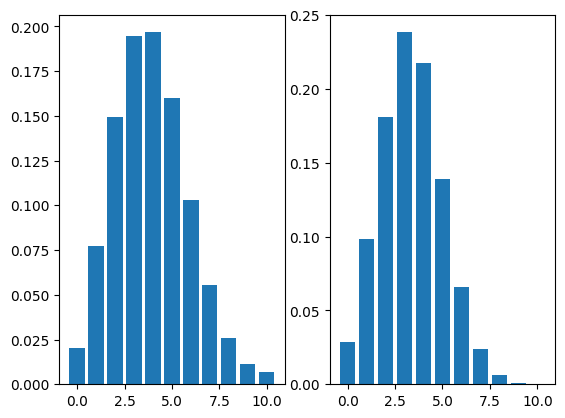

In [163]:
def gen_joint_erlang_system(A,m,size):
    g = lambda i: (A**i / np.math.factorial(i))
    #init start-values
    x = np.random.randint(0,m)
    my = m-x
    y = np.random.randint(0,my)
    holderX = []
    holderY = []
    while(len(holderY)<size):
        xc = np.random.uniform() #generate a candidate - no need to work with conditional
        #alpha = f(xc+x)/f(x)
        if(xc>=0.5):
            dx = 1
        else:
            dx = -1
        x_tmp = x + dx
        if(x_tmp>m):
            x_tmp = 0
        elif(x_tmp<0):
            x_tmp = m

        alpha_c = g(x_tmp)
        alpha = g(x)

        if(alpha_c>=alpha):#accept
            x = x_tmp
        else:#lottery 
            U = np.random.uniform() #lottery draw 
            tmp_alpha = alpha_c/alpha
            if(U<=tmp_alpha):#accept
                x = x_tmp
        holderX.append(x)
        my = m-x

        yc = np.random.uniform() #generate a candidate - no need to work with conditional
        #alpha = f(xc+x)/f(x)
        if(yc>=0.5):
            dy = 1
        else:
            dy = -1
        y_tmp = y + dy
        if(y_tmp>my):
            y_tmp = 0
        elif(y_tmp<0):
            y_tmp = my

        alpha_c = g(y_tmp)
        alpha = g(y)

        if(alpha_c>=alpha):#accept
            y = y_tmp
        else:#lottery 
            U = np.random.uniform() #lottery draw 
            tmp_alpha = alpha_c/alpha
            if(U<=tmp_alpha):#accept
                y = y_tmp
        holderY.append(y)

    return holderX,holderY

m = 10
A = 4
X,Y = gen_joint_erlang_system(A,m,10000)


fig, ax = plt.subplots(1,2)
vals,freq = np.histogram(X,bins=m+1)
ax[0].bar(range(m+1),vals/vals.sum())
vals,freq = np.histogram(Y,bins=m+1)
ax[1].bar(range(m+1),vals/vals.sum())

Text(0, 0.5, 'i')

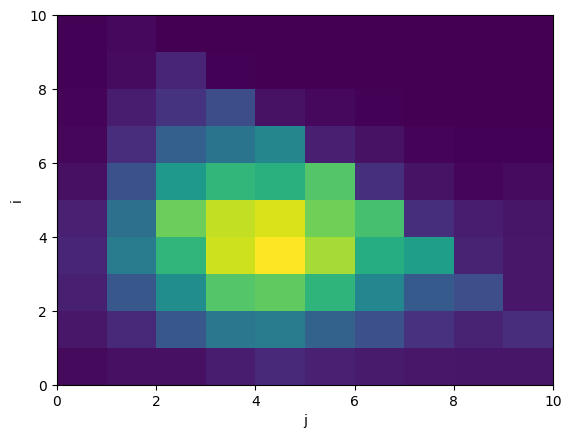

In [178]:
fig, ax = plt.subplots(1,1)
ax.hist2d(X,Y)
ax.set_xlabel("j")
ax.set_ylabel("i")

We notice that it is not at all symmetrical, which it should be if we did not generate using so much dependency (large Y is more dependent on X than X on Y).
Lets make a chisq-test:

Text(0, 0.5, 'i')

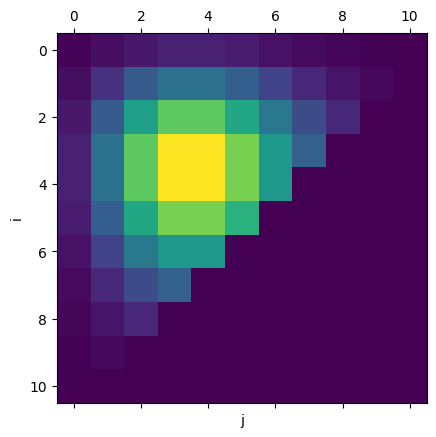

In [200]:
P = np.zeros((m+1,m+1))
for i in range(m+1):
    j = 0
    while (j+i<=m):
        P[i,j] = (A**i)/np.math.factorial(i) * (A**j)/np.math.factorial(j)
        j += 1

c = 1/np.sum(P)
P = c*P
fig, ax = plt.subplots(1,1)
ax.matshow(P)
ax.set_xlabel("j")
ax.set_ylabel("i")


Obviously, we would expect a symmetric distribution mirrored through i=j, but ours is more skewed to lower values of j and larger values of i. 

Let's make a chisq-test

In [194]:
def bincount2d(arr, bins=None):
    if bins is None:
        bins = np.max(arr) + 1
    count = np.zeros(shape=[len(arr), bins], dtype=np.int64)
    indexing = (np.ones_like(arr).T * np.arange(len(arr))).T
    np.add.at(count, (indexing, arr), 1)

    return count

nan


/home/max/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7412: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/home/max/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7412: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

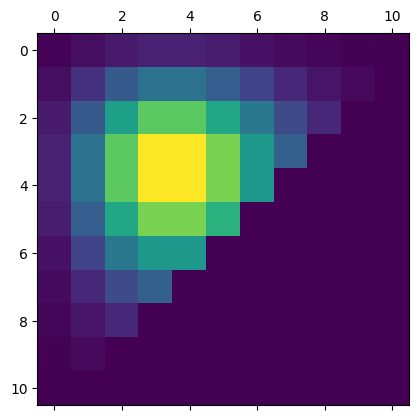

In [247]:
P_measured = np.column_stack((X,Y)) #also i,j format
#count number of occurences of each entry

def count_2d_occurences_list(X,Y,m):
    obs = np.zeros((m+1,m+1))
    for i in range(len(X)):
        obs[X[i],Y[i]] += 1
    return obs

bincountsMeasured = count_2d_occurences_list(X,Y,m)
P_expected = P*len(X)

plt.figure()
plt.matshow(bincountsMeasured)
plt.figure()
plt.matshow(P_expected)

X2,p = st.chisquare(bincountsMeasured,P_expected,ddof=m-1,axis=None) #Dont know why this does not work. Both arrays sum to one
#issue is probably that there are zeros in expected table, and these should not be used. Solution may be: flatten, index expected>0, use this index for observed aswell and normalize

#it also seems you have points which are not allowed!

In [236]:
print(np.sum(P_expected))
print(np.sum(bincountsMeasured))

10000.0
10000.0


In [213]:
print(np.sum(P_measured==np.array([5,11])))

1597


In [207]:
print(P_measured)

[[4 2]
 [5 3]
 [4 3]
 ...
 [6 4]
 [5 4]
 [4 3]]


In [203]:
print(len(X))
print(len(Y))

10000
10000
